In [28]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))

# Remove "WineQT.csv/" from all column names
record_set_df.columns = record_set_df.columns.str.replace("WineQT.csv/", "", regex=False)


  -  [Metadata(Wine Quality Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="WineQT.csv")]


# Exercise 1
## 1.1 Data Exploration
### 1.1.1 Load the dataset into a DataFrame and display the first 5 rows. Print the dataset information and summary statistics

In [29]:
(record_set_df.head(5))

,fixed+acidity,volatile+acidity,citric+acid,residual+sugar,chlorides,free+sulfur+dioxide,total+sulfur+dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,b'0'
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,b'1'
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,b'2'
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,b'3'
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,b'4'


In [30]:
(record_set_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed+acidity         1143 non-null   float64
 1   volatile+acidity      1143 non-null   float64
 2   citric+acid           1143 non-null   float64
 3   residual+sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free+sulfur+dioxide   1143 non-null   float64
 6   total+sulfur+dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 116.2+ KB


### 1.1.2 Which features show the highest variation based on summary statistics

In [31]:
summary = record_set_df.describe()
print(summary)
# WineQT.csv/free+sulfur+dioxide has the highest standard deviation among all numerical columns.

       fixed+acidity  volatile+acidity  citric+acid  residual+sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free+sulfur+dioxide  total+sulfur+dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

## Correlation Analysis
### 1.2.1 Compute the correlation matrix of all features.

In [32]:
correlation_matrix = record_set_df.corr()
print(correlation_matrix)

                      fixed+acidity  volatile+acidity  citric+acid  \
fixed+acidity              1.000000         -0.250728     0.673157   
volatile+acidity          -0.250728          1.000000    -0.544187   
citric+acid                0.673157         -0.544187     1.000000   
residual+sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free+sulfur+dioxide       -0.164831         -0.001962    -0.057589   
total+sulfur+dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

### 1.2.2 Plot a heatmap of the correlation matrix.

<Axes: >

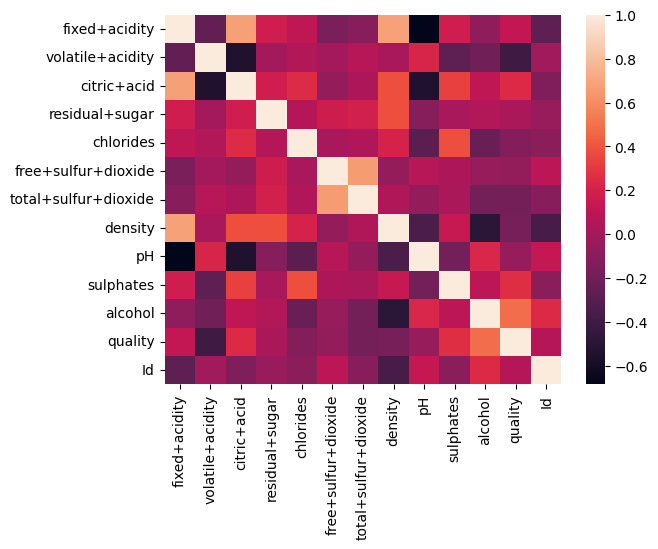

In [33]:
import seaborn as sns

sns.heatmap(correlation_matrix)

### 1.2.3 Which variable has the strongest positive correlation with quality? Which variable has the strongest negative correlation with quality?

In [34]:
# Unstack to get feature pairs
corr_pairs = correlation_matrix.unstack()

# Remove self-correlations (correlation = 1.0 on the diagonal)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort correlations
sorted_corr = corr_pairs.sort_values(ascending=False)

# Strongest positive correlations
print("Top positive correlations:")
print(sorted_corr.head(5))

# Strongest negative correlations
print("\nTop negative correlations:")
print(sorted_corr.tail(5))

Top positive correlations:
fixed+acidity         density                0.681501
density               fixed+acidity          0.681501
fixed+acidity         citric+acid            0.673157
citric+acid           fixed+acidity          0.673157
total+sulfur+dioxide  free+sulfur+dioxide    0.661093
dtype: float64

Top negative correlations:
citric+acid    volatile+acidity   -0.544187
pH             citric+acid        -0.546339
citric+acid    pH                 -0.546339
fixed+acidity  pH                 -0.685163
pH             fixed+acidity      -0.685163
dtype: float64


### 1.2.4 Between alcohol and pH, which do you expect to better predict wine quality? Justify your answer.

In [35]:
alchol_quality = corr_pairs[
	(corr_pairs.index.get_level_values(0) == 'WineQT.csv/quality') &
	(corr_pairs.index.get_level_values(1) == 'WineQT.csv/alcohol')
]
ph_quality = corr_pairs[
	(corr_pairs.index.get_level_values(0) == 'WineQT.csv/quality') &
	(corr_pairs.index.get_level_values(1) == 'WineQT.csv/pH')
]
print("\nCorrelation between alcohol and quality:")
print(alchol_quality)
print("\nCorrelation between PH and quality:")
print(ph_quality)



Correlation between alcohol and quality:
Series([], dtype: float64)

Correlation between PH and quality:
Series([], dtype: float64)


Alchol predicts much better the wine quality. This could be due to the difficulty of achieving a higher alchol percentage, rather than a higher "pH" value.

## 1.3 Linear Regression
### 1.3.1 Fit a simple linear regression model using gradient descent to predict quality using only chlorides. TODO!

In [36]:
from IPython.display import Image, display

display(Image(url="https://miro.medium.com/v2/0*MJdfy7jBT0KTXQE0.jpg"))


The Mean Squared Error (MSE) is defined as:

$$
\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Mean Squared Error (MSE) in linear regression quantifies the average squared difference between the observed (actual) and predicted values, serving as a loss function to evaluate the model's accuracy. It's calculated by summing the squared differences for each data point and dividing by the total number of observations, with lower MSE values indicating a better fit of the regression line to the data

In [37]:
import numpy as np

# Extract data
X = record_set_df['chlorides'].values
y = record_set_df['quality'].values

# normalize
X_chlor = (X - X.mean()) / X.std()

# initialize
w, b = 0.0, 0.0
alpha, epochs = 0.01, 1000
n = len(y)

for _ in range(epochs):
    y_pred = w*X_chlor + b
    error = y_pred - y
    dw = (2/n) * np.dot(error, X_chlor)
    db = (2/n) * error.sum()
    w -= alpha * dw
    b -= alpha * db

print(f"Feature: chlorides, Target: quality")
print("Coefficents:", w)
print("Intercept:", b)

Feature: chlorides, Target: quality
Coefficents: -0.09994657412031588
Intercept: 5.657042860120676


### 1.3.2 Fit a simple linear regression model predicting quality using only alcohol.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Extract data
X = record_set_df['alcohol'].values.reshape(-1, 1)  # feature
y = record_set_df['quality'].values.reshape(-1, 1)   # target

# normalize
X_alc = (X - X.mean()) / X.std()

# Define the model
model = LinearRegression()
model.fit(X_alc,y)

# Print coefficients and intercept
print(f"Feature: alcohol, Target: quality")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Feature: alcohol, Target: quality
Coefficients: [[0.390546]]
Intercept: [5.65704287]


### 1.3.3 Report the regression coefficient and intercept and compare both the models.

Coefficents:
- Feature: chlorides, Target: quality
Coefficents: -0.09994657412031588
Intercept: 5.657042860120676



- Feature: alcohol, Target: quality
Coefficients: 0.390546
Intercept: 5.65704287

- Regression with chlorides produced a coefficient of -0.0999 and an intercept of 5.66, suggesting that higher chloride levels are associated with lower wine quality.

- Regression with alchol produced a coefficent of 0.390546 and an intercept of 5.657,  suggesting that higher alchol levels are associated with higher wine quality.

### 1.3.4 Plot the regression line against the data points. Does the regression line fit the data well for chlorides or alcohol? Why or why not?

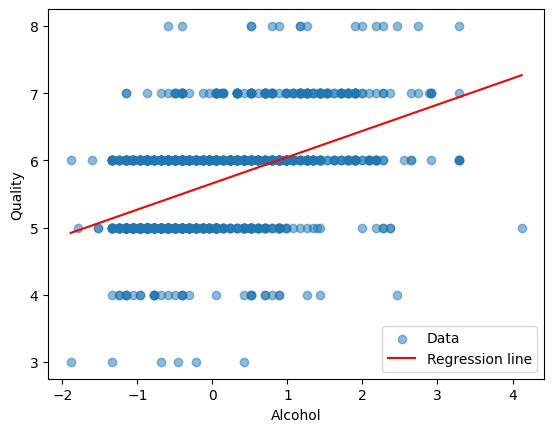

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sort X for smooth line
X_sorted = np.sort(X_alc, axis=0)
y_pred_sorted = model.predict(X_sorted)

plt.scatter(X_alc, y, alpha=0.5, label="Data")
plt.plot(X_sorted, y_pred_sorted, color="red", label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.legend()
plt.show()

The scatter plots shows a somewhat positive trend. The linear regression model does not capture it, but it follows a trend. Alcohol could be a strong predictor for quality.

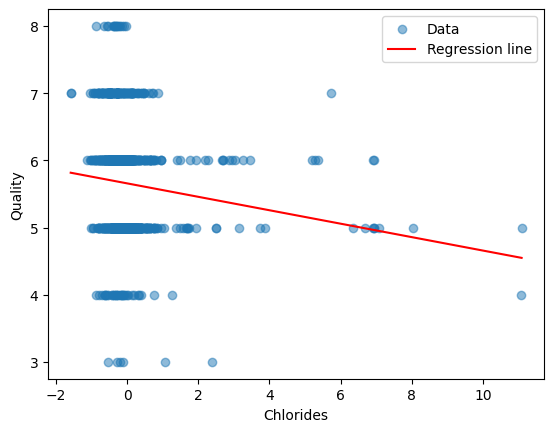

In [40]:
import matplotlib.pyplot as plt

y_pred = w * X_chlor + b

order = np.argsort(X_chlor) 
plt.scatter(X_chlor, y, alpha=0.5, label="Data")
plt.plot(X_chlor[order], y_pred[order], color="red", label="Regression line")

plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.legend()
plt.show()

The scatter plots shows a negative trend. The linear regression model does not capture it, and it doesnt seem to capture the trend. Chloride does not seem to be a good predictor for quality.

## 1.4 Train-Test Split
Split the dataset into training (80%) and test (20%) sets in 5 different folds. Train the simple linear regression model (using gradient descent) for each split on the train-test data in each fold. Evaluate the model on the test set in each fold using

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- $R^2$ score

In [41]:
simple_preds = {
    "alcohol": {"y_true": [], "y_pred": []},
    "chlorides": {"y_true": [], "y_pred": []},
}

In [42]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

features = ["chlorides", "alcohol"]
alcohol_results = []
chlorides_results = []
alpha = 0.01
epochs = 1000
k = 5  # 5 folds (each fold uses 80% train / 20% test automatically)
 
y_all = record_set_df["quality"].values.astype(float)

def fit_linear_gd(X, y, alpha=0.01, epochs=1000):
    """
    Fit y ~ w * z + b via gradient descent where z is the standardized X.
    Returns (w, b, mu, sigma) where mu/sigma are for transforming future X.
    """
    mu = X.mean()
    sigma = X.std() if X.std() != 0 else 1.0
    Z = (X - mu) / sigma

    w, b = 0.0, 0.0
    n = len(y)
    for _ in range(epochs):
        y_pred = w * Z + b
        err = y_pred - y
        dw = (2/n) * np.dot(err, Z)
        db = (2/n) * err.sum()
        w -= alpha * dw
        b -= alpha * db
    return w, b, mu, sigma

def predict_with_norm(X, w, b, mu, sigma):
    Z = (X - mu) / (sigma if sigma != 0 else 1.0)
    return w * Z + b

kf = KFold(n_splits=k, shuffle=True, random_state=42)

def print_summary(label, fold_results):
    mses = np.array([m for m, _, _, _, _ in fold_results], dtype=float)
    rmses = np.array([rm for _, rm, _, _, _ in fold_results], dtype=float)
    r2s = np.array([r for _, _, r, _, _ in fold_results], dtype=float)

    print("\n=== 5-Split Summary ===")
    print(f"{label} average MSE: {mses.mean():.4f} ± {mses.std():.4f}")
    print(f"{label} average RMSE: {rmses.mean():.4f} ± {rmses.std():.4f}")
    print(f"{label} average R² : {r2s.mean():.4f} ± {r2s.std():.4f}")

def evaluate_feature(feature_col):
    X_all = record_set_df[feature_col].values.astype(float)
    fold_results = []
    print(f"\nFeature: {feature_col}")
    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_all), start=1):
        X_tr, X_te = X_all[train_idx], X_all[test_idx]
        y_tr, y_te = y_all[train_idx], y_all[test_idx]

        # fit on TRAIN ONLY (compute mu/sigma from train to avoid leakage)
        w, b, mu, sigma = fit_linear_gd(X_tr, y_tr, alpha=alpha, epochs=epochs)

        # evaluate on TEST
        y_pred_te = predict_with_norm(X_te, w, b, mu, sigma)


        # save predictions for this feature
        simple_preds[feature_col]["y_true"].append(y_te)
        simple_preds[feature_col]["y_pred"].append(y_pred_te)
        
        mse = mean_squared_error(y_te, y_pred_te)
        r2  = r2_score(y_te, y_pred_te)
        rmse = root_mean_squared_error(y_te, y_pred_te)

        fold_results.append((mse, rmse, r2, w, b))
        if (feature_col == "alcohol"):
            alcohol_results.append({"mse": mse, "rmse":rmse, "r2":r2})
        if (feature_col == "chlorides"):
            chlorides_results.append({"mse": mse, "rmse":rmse, "r2":r2})
        
        print(f"Split {fold_idx}: MSE={mse:.4f} RMSE={rmse:.4f}  R²={r2:.4f}  (w={w:.4f}, b={b:.4f})")
       
    return fold_results

for feature in features:
    fold_results = evaluate_feature(feature)
    print_summary(feature, fold_results)



Feature: chlorides
Split 1: MSE=0.5591 RMSE=0.7478  R²=-0.0048  (w=-0.1137, b=5.6565)
Split 2: MSE=0.7266 RMSE=0.8524  R²=0.0133  (w=-0.0998, b=5.6608)
Split 3: MSE=0.6591 RMSE=0.8118  R²=0.0274  (w=-0.0851, b=5.6630)
Split 4: MSE=0.6658 RMSE=0.8160  R²=0.0246  (w=-0.0905, b=5.6579)
Split 5: MSE=0.5916 RMSE=0.7692  R²=-0.0057  (w=-0.1114, b=5.6470)

=== 5-Split Summary ===
chlorides average MSE: 0.6405 ± 0.0590
chlorides average RMSE: 0.7994 ± 0.0369
chlorides average R² : 0.0110 ± 0.0141

Feature: alcohol
Split 1: MSE=0.4175 RMSE=0.6462  R²=0.2497  (w=0.3948, b=5.6565)
Split 2: MSE=0.5900 RMSE=0.7681  R²=0.1988  (w=0.3924, b=5.6608)
Split 3: MSE=0.5140 RMSE=0.7169  R²=0.2415  (w=0.3867, b=5.6630)
Split 4: MSE=0.4998 RMSE=0.7070  R²=0.2677  (w=0.3805, b=5.6579)
Split 5: MSE=0.4632 RMSE=0.6806  R²=0.2126  (w=0.3984, b=5.6470)

=== 5-Split Summary ===
alcohol average MSE: 0.4969 ± 0.0573
alcohol average RMSE: 0.7038 ± 0.0404
alcohol average R² : 0.2341 ± 0.0250


"A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors." (See p.39, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow)

The "Mean Squared Error" (MSE) is the same as RMSE except we do not take the root of the error.
 
An $R^2$ value at 1 means that the model predicts the data perfectly and there is no difference between the predicted value and actual value. An $R^2$ value that is 0 or close to it means that the model does not predict the data.


Results:
- With an $R^2$ of 0.2341 for the "Alcohol" result is significantly higher than the results using "Chlorides" ($R^2$ 0.2341) as a feature for predicting the quality.
- With an RMSE value for "Alcohol" (0.7038) for "Chlorides" is 0.7994, which indicates that the model using "Alcohol" as a feature makes less errors than with the modeil using "Chlorides".

### 1.4.1 How well does alcohol alone predict wine quality in each split?
Across the different splits this is observed: 
- $R^2$ explains about 23% of the quality
- It misses with about 0.7 from the observed wine-quality scores
- Relative high $RMSE$ and low $R^2$ suggests that alcohol alone is a weak predictor for quality.
- This suggests that other features are needed for stronger performance

### 1.4.2 How well does chloride alone predict wine quality in each split?
Across the different splits this is observed: 
- $R^2$ explains about 1% of the quality
- It misses with about 0.8 from the observed wine-quality scores
- Relative high $RMSE$ and low $R^2$ suggests that chlorid is a weak predictor for quality.
- This suggests that other features are needed for stronger performance


### 1.4.3 Do you think the model underfits? Why?
Underfitting happens when a model is too simple to capture the true patterns that appear in the data.
I think the model underfits the data because for a couple of reasons. Firstly, I think the model underfits since it produces large errors, Secondly, the models does not perform paticulary well. Thirdly, the models only use on feature, which is probably not enough to see the true patterns in the data. Based on this I think the model underfits. 


### 1.4.4 Provide the mean and variance from the 5 different folds and comment on the variation in performance across all 5 folds when using alcohol versus chloride


In [43]:
for label, results in [("alcohol", alcohol_results), ("chlorides", chlorides_results)]:
    if not results:
        continue
    metrics = {
        "MSE": [row["mse"] for row in results],
        "RMSE": [row["rmse"] for row in results],
        "R²": [row["r2"] for row in results],
    }
    for name, values in metrics.items():
        values = np.asarray(values, dtype=float)
        mean = values.mean()
        variance = values.var()
        print(f"{label} {name}: mean={mean:.4f}, variance={variance:.6f}")



alcohol MSE: mean=0.4969, variance=0.003280
alcohol RMSE: mean=0.7038, variance=0.001635
alcohol R²: mean=0.2341, variance=0.000627
chlorides MSE: mean=0.6405, variance=0.003483
chlorides RMSE: mean=0.7994, variance=0.001365
chlorides R²: mean=0.0110, variance=0.000198


## 1.5 Multiple Linear Regression
### 1.5.1 Train a multiple linear regression model using all features to predict quality using the same splits as used in previous question. Evaluate the model on the test set using $MSE$, $RMSE$, and $R^2$.

In [44]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Train test
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# All columns except the target
feature_cols = [col for col in record_set_df.columns if col != "quality"]
X_all = record_set_df[feature_cols].values.astype(float)
y_all = record_set_df["quality"].values.astype(float)

# multiple preprocessing steps
pipeline = Pipeline([
    ("scaler", StandardScaler()),      
    ("linreg", LinearRegression())
])

fold_results = []

for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_all), start=1):
    X_train, X_test = X_all[train_idx], X_all[test_idx]
    y_train, y_test = y_all[train_idx], y_all[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    fold_results.append((mse, rmse, r2))
    print(f"Split {fold_idx}: MSE={mse:.4f}  RMSE={rmse:.4f}  R²={r2:.4f}")

mses, rmses, r2s = map(np.array, zip(*fold_results))
print("\n=== 5-Split Summary ===")
print(f"Average MSE: {mses.mean():.4f} ± {mses.std():.4f}")
print(f"Average RMSE: {rmses.mean():.4f} ± {rmses.std():.4f}")
print(f"Average R² : {r2s.mean():.4f} ± {r2s.std():.4f}")


Split 1: MSE=0.3824  RMSE=0.6184  R²=0.3128
Split 2: MSE=0.4836  RMSE=0.6954  R²=0.3434
Split 3: MSE=0.4320  RMSE=0.6573  R²=0.3625
Split 4: MSE=0.4095  RMSE=0.6400  R²=0.4000
Split 5: MSE=0.3776  RMSE=0.6145  R²=0.3580

=== 5-Split Summary ===
Average MSE: 0.4170 ± 0.0386
Average RMSE: 0.6451 ± 0.0295
Average R² : 0.3553 ± 0.0283


### 1.5.2 Compare the results of simple vs multiple regression in terms of $MSE$, $RMSE$, and $R^2$

In [45]:
mses, rmses, r2s = map(np.array, zip(*fold_results))
print("\n=== Multiple regression ===")
print("\n=== 5-Split Summary ===")
print(f"Average MSE: {mses.mean():.4f} ± {mses.std():.4f}")
print(f"Average RMSE: {rmses.mean():.4f} ± {rmses.std():.4f}")
print(f"Average R² : {r2s.mean():.4f} ± {r2s.std():.4f}")

metric_names = ["MSE", "RMSE", "R²"]
feature = "alcohol"

print("\n=== Simple regression ===")
fold_results = evaluate_feature(feature)
print_summary(feature, fold_results)


=== Multiple regression ===

=== 5-Split Summary ===
Average MSE: 0.4170 ± 0.0386
Average RMSE: 0.6451 ± 0.0295
Average R² : 0.3553 ± 0.0283

=== Simple regression ===

Feature: alcohol
Split 1: MSE=0.4175 RMSE=0.6462  R²=0.2497  (w=0.3948, b=5.6565)
Split 2: MSE=0.5900 RMSE=0.7681  R²=0.1988  (w=0.3924, b=5.6608)
Split 3: MSE=0.5140 RMSE=0.7169  R²=0.2415  (w=0.3867, b=5.6630)
Split 4: MSE=0.4998 RMSE=0.7070  R²=0.2677  (w=0.3805, b=5.6579)
Split 5: MSE=0.4632 RMSE=0.6806  R²=0.2126  (w=0.3984, b=5.6470)

=== 5-Split Summary ===
alcohol average MSE: 0.4969 ± 0.0573
alcohol average RMSE: 0.7038 ± 0.0404
alcohol average R² : 0.2341 ± 0.0250


Multiple regression performs better in terms of $MSE$, $RMSE$ and $R^2$ than simple regression

### 1.5.3 Provide comparison plots for multiple versus simple linear regression solved in previous exercise. At-least one of the following plots among (i) Cost vs Iteration, (optimization) (ii) Parameter Convergence (coefficients) (iii) Predicted vs Actual (performance) and (iv) Residuals Plot (assumptions check) should be provided

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

X = record_set_df[['chlorides']].values  # feature as 2D array
y = record_set_df['quality'].values

# Standardize + regression in one pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipeline.fit(X, y)

print("Coefficient:", pipeline.named_steps["linreg"].coef_[0])
print("Intercept:", pipeline.named_steps["linreg"].intercept_)

Coefficient: -0.09994657428852272
Intercept: 5.657042869641295


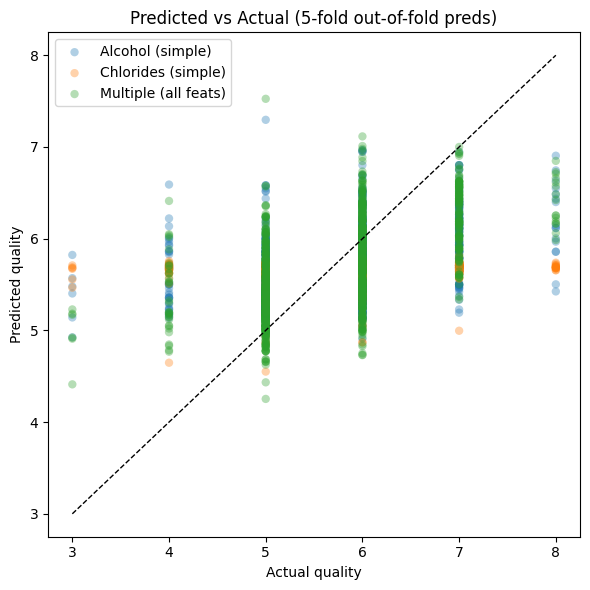

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# data
y_all   = record_set_df["quality"].values.astype(float)
X_chlor = record_set_df[["chlorides"]].values.astype(float)  # 2D
X_alc   = record_set_df[["alcohol"]].values.astype(float)    # 2D
feature_cols = [c for c in record_set_df.columns if c != "quality"]
X_multi = record_set_df[feature_cols].values.astype(float)

# 5-fold CV splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# pipelines (scaler + OLS)
pipe_simple = lambda: Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipe_multi = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

# out-of-fold predictions (no manual loop needed)
yp_chl = cross_val_predict(pipe_simple(), X_chlor, y_all, cv=kf)
yp_alc = cross_val_predict(pipe_simple(), X_alc,   y_all, cv=kf)
yp_mul = cross_val_predict(pipe_multi,    X_multi, y_all, cv=kf)

# plot: predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_all, yp_alc, alpha=0.35, label="Alcohol (simple)",   edgecolors="none")
plt.scatter(y_all, yp_chl, alpha=0.35, label="Chlorides (simple)", edgecolors="none")
plt.scatter(y_all, yp_mul, alpha=0.35, label="Multiple (all feats)", edgecolors="none")

mn, mx = y_all.min(), y_all.max()
plt.plot([mn, mx], [mn, mx], "k--", linewidth=1)  # y=x
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")
plt.title("Predicted vs Actual (5-fold out-of-fold preds)")
plt.legend()
plt.tight_layout()
plt.show()

### 1.5.4 Which model performs better and why?
The multiple regression performs better.
- It has accees to more features than the simple linear regression models that only have access to alcohol/chloride
- Better performance on $R^2$ and $RMSE$ than the others
- Visually it can be observed that the multiple regression is closed to the diagonal, which indicates better performance.

# Exercise 2
## 2.1 Which features are most suitable/influential in predicting wine quality? (Tip - You can consider feature importance ranking.)

In [48]:
correlations = record_set_df.corr()["quality"].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric+acid             0.240821
fixed+acidity           0.121970
Id                      0.069708
residual+sugar          0.022002
pH                     -0.052453
free+sulfur+dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total+sulfur+dioxide   -0.183339
volatile+acidity       -0.407394
Name: quality, dtype: float64


## 2.2 The models you trained so far assume a linear relationship between features and target.

### a) Polynomial regression: Extend the feature space to include quadratic or interaction terms. Does this improve performance?
It does not improve the performance.

In [49]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# features and target
X_all = record_set_df.drop(columns=["quality"]).values.astype(float)
y_all = record_set_df["quality"].values.astype(float)

# baseline: plain linear regression
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

# polynomial regression (quadratic + interactions)
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  # quadratic + interactions
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])


In [50]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def eval_pipeline(pipeline, X, y):
    # R² directly
    r2 = cross_val_score(pipeline, X, y, cv=kf, scoring="r2")
    # cross_val_score returns NEGATIVE MSE (because sklearn expects a "higher is better" metric)
    neg_mse = cross_val_score(pipeline, X, y, cv=kf, scoring="neg_mean_squared_error")
    mse = -neg_mse
    rmse = np.sqrt(mse)

    return r2, rmse, mse

# Linear vs Polynomial (degree=2)
linear_r2, linear_rmse, linear_mse = eval_pipeline(linear_pipeline, X_all, y_all)
poly_r2,   poly_rmse,   poly_mse   = eval_pipeline(poly_pipeline,   X_all, y_all)

print("=== Linear Regression ===")
print(f"Average R²   : {linear_r2.mean():.4f} ± {linear_r2.std():.4f}")
print(f"Average RMSE : {linear_rmse.mean():.4f} ± {linear_rmse.std():.4f}")

print("\n=== Polynomial Regression (degree=2) ===")
print(f"Average R²   : {poly_r2.mean():.4f} ± {poly_r2.std():.4f}")
print(f"Average RMSE : {poly_rmse.mean():.4f} ± {poly_rmse.std():.4f}")

=== Linear Regression ===
Average R²   : 0.3553 ± 0.0283
Average RMSE : 0.6451 ± 0.0295

=== Polynomial Regression (degree=2) ===
Average R²   : 0.2817 ± 0.0818
Average RMSE : 0.6793 ± 0.0339


### b) Regularization: Train models using Ridge and Lasso regression. How do these methods affect the coefficients and model generalization?
Introducing polynomial and interaction terms increases model complexity and adds many more coefficients. While this allows the model to capture non-linear relationships, it also makes coefficients harder to interpret and can lead to unstable, large parameter values due to multicollinearity. In our dataset, polynomial regression without regularization performed worse than plain linear regression, suggesting overfitting. Regularization methods (like Ridge) shrink coefficients and improve stability, helping the polynomial model generalize better. Overall, plain linear regression provided a better balance of interpretability and generalization for this dataset.


In [51]:
from sklearn.linear_model import Ridge

poly_ridge = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42)),
])

# Linear vs Polynomial (degree=2)
linear_r2, linear_rmse, linear_mse = eval_pipeline(linear_pipeline, X_all, y_all)
poly_r2,   poly_rmse,   poly_mse   = eval_pipeline(poly_ridge,   X_all, y_all)

print("=== Linear Regression ===")
print(f"Average R²   : {linear_r2.mean():.4f} ± {linear_r2.std():.4f}")
print(f"Average RMSE : {linear_rmse.mean():.4f} ± {linear_rmse.std():.4f}")

print("\n=== Polynomial Regression (Ridge) ===")
print(f"Average R²   : {poly_r2.mean():.4f} ± {poly_r2.std():.4f}")
print(f"Average RMSE : {poly_rmse.mean():.4f} ± {poly_rmse.std():.4f}")

=== Linear Regression ===
Average R²   : 0.3553 ± 0.0283
Average RMSE : 0.6451 ± 0.0295

=== Polynomial Regression (Ridge) ===
Average R²   : 0.3382 ± 0.0325
Average RMSE : 0.6533 ± 0.0245


### c) Model comparison: Compare your linear regression results to a non-linear model (e.g., Decision Tree or Random Forest). Which performs better, and why?
Random Forest Regression outperformed linear regression (R² and RMSE) This improvement comes from its ability to capture non-linear feature interactions and complex relationships that linear regression cannot model.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_r2 = cross_val_score(rf, X_all, y_all, cv=kf, scoring="r2")
rf_rmse = np.sqrt(-cross_val_score(rf, X_all, y_all, cv=kf, scoring="neg_mean_squared_error"))


In [53]:
print("=== Linear Regression ===")
print(f"Average R²   : {linear_r2.mean():.4f} ± {linear_r2.std():.4f}")
print(f"Average RMSE : {linear_rmse.mean():.4f} ± {linear_rmse.std():.4f}")
print("\n=== Random Forest ===")
print(f"Average R²   : {rf_r2.mean():.4f} ± {rf_r2.std():.4f}")
print(f"Average RMSE : {rf_rmse.mean():.4f} ± {rf_rmse.std():.4f}")

=== Linear Regression ===
Average R²   : 0.3553 ± 0.0283
Average RMSE : 0.6451 ± 0.0295

=== Random Forest ===
Average R²   : 0.4524 ± 0.0271
Average RMSE : 0.5949 ± 0.0357
